# HEART DISEASE PREDICTION USING RANDOM FOREST, NAVIE BAYES,DECISION TREE CLASSIFIER MODEL

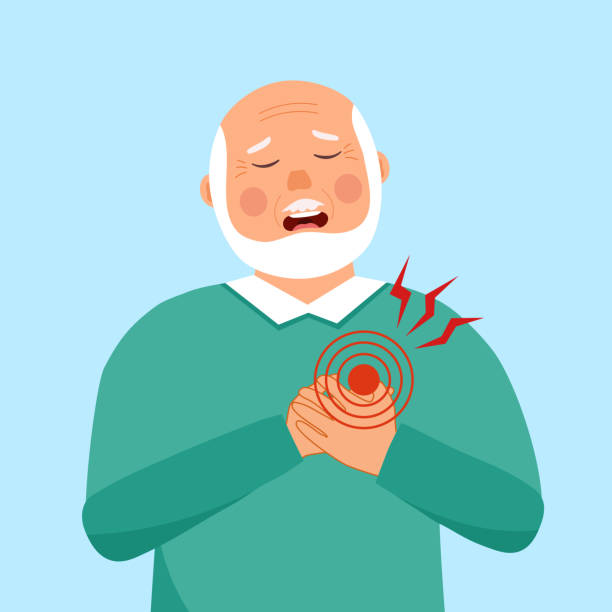

In [ ]:
                  3.3 Classifiers Used For Experiments
    
# age: age in years
# sex: sex (1 = male; 0 = female)
# cp: chest pain type
# -- Value 1: typical angina
# -- Value 2: atypical angina
# -- Value 3: non-anginal pain
# -- Value 4: asymptomatic
# trestbps: resting blood pressure (in mm Hg on admission to the hospital)

# 16 fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
# 12 chol: serum cholestoral in mg/dl    
# restecg: resting electrocardiographic results
# -- Value 0: normal
# -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
# -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
# thalach: maximum heart rate achieved
# exang: exercise induced angina (1 = yes; 0 = no)   
# oldpeak = ST depression induced by exercise relative to rest
# 41 slope: the slope of the peak exercise ST segment
# -- Value 1: upsloping
# -- Value 2: flat
# -- Value 3: downsloping
# thal: 3 = normal; 6 = fixed defect; 7 = reversable defec
# ca: number of major vessels (0-3) colored by flourosopy    
    
    

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('D:\csv\heart (1).csv')

In [4]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
data.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [33]:
data.shape


(303, 14)

In [6]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
pd.set_option('display.float','{:.2f}'.format)
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [8]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [9]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [10]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
categorical_val=[]
continous_val=[]
for column in data.columns:
    if len(data[column].unique())<=10:
        categorical_val.append(column)
    else:
        continous_val.append(column)
        

In [9]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Here we will be checking the 10 age and thier counts

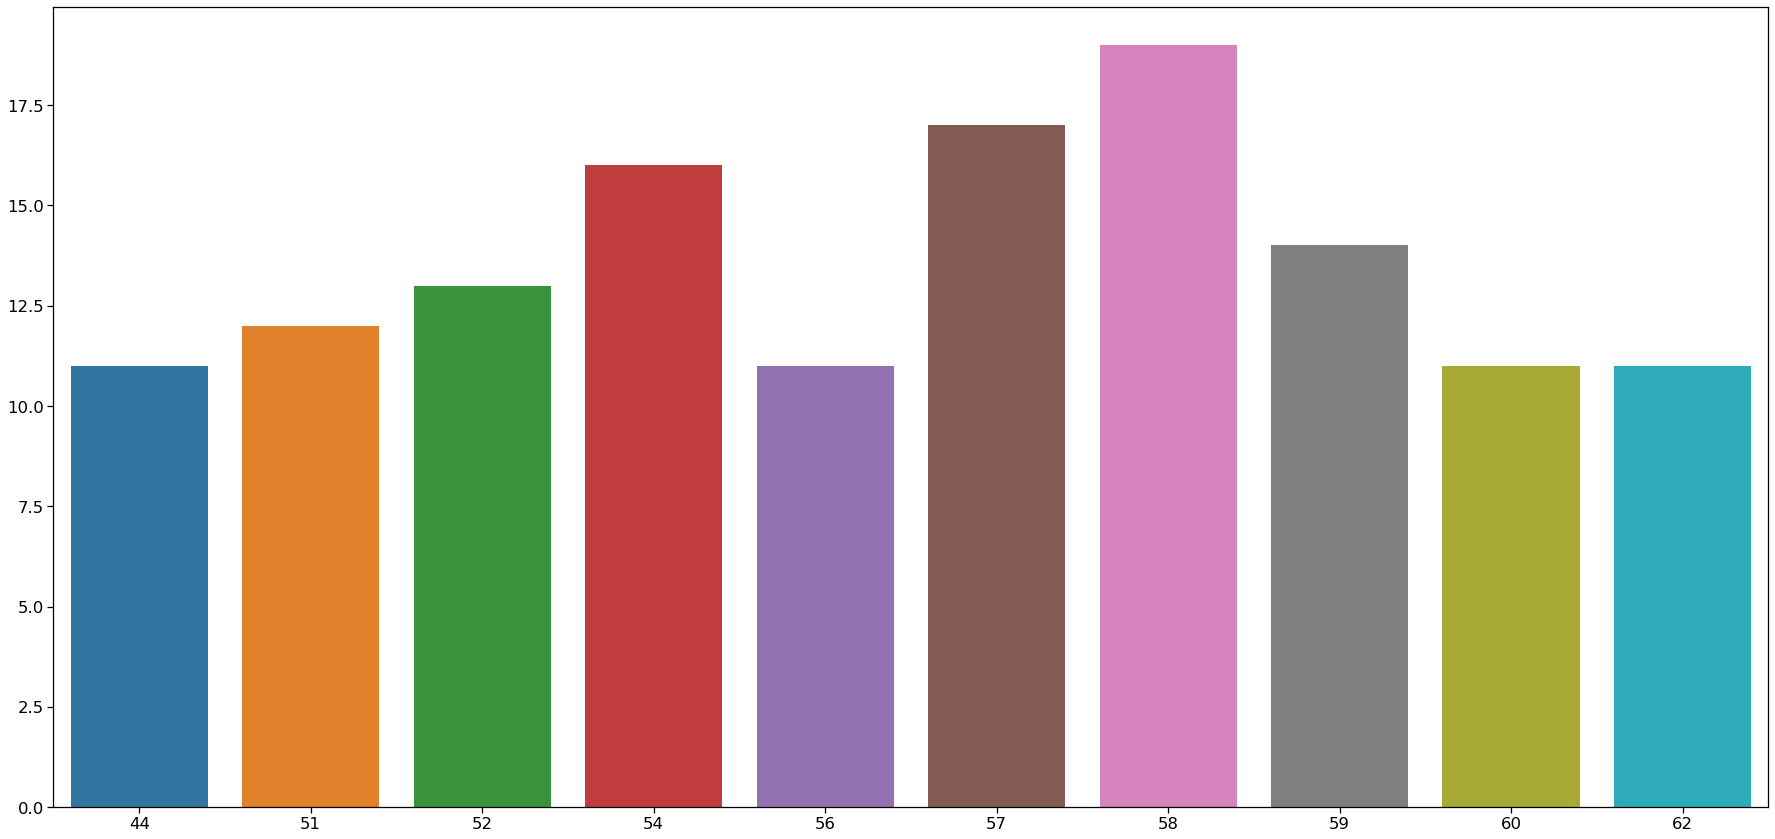

In [11]:
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale=1.5)
sns.barplot(x=data.age.value_counts()[:10].index,
            y=data.age.value_counts()[:10].values)
plt.tight_layout()

## Q.which feature has a highter value?

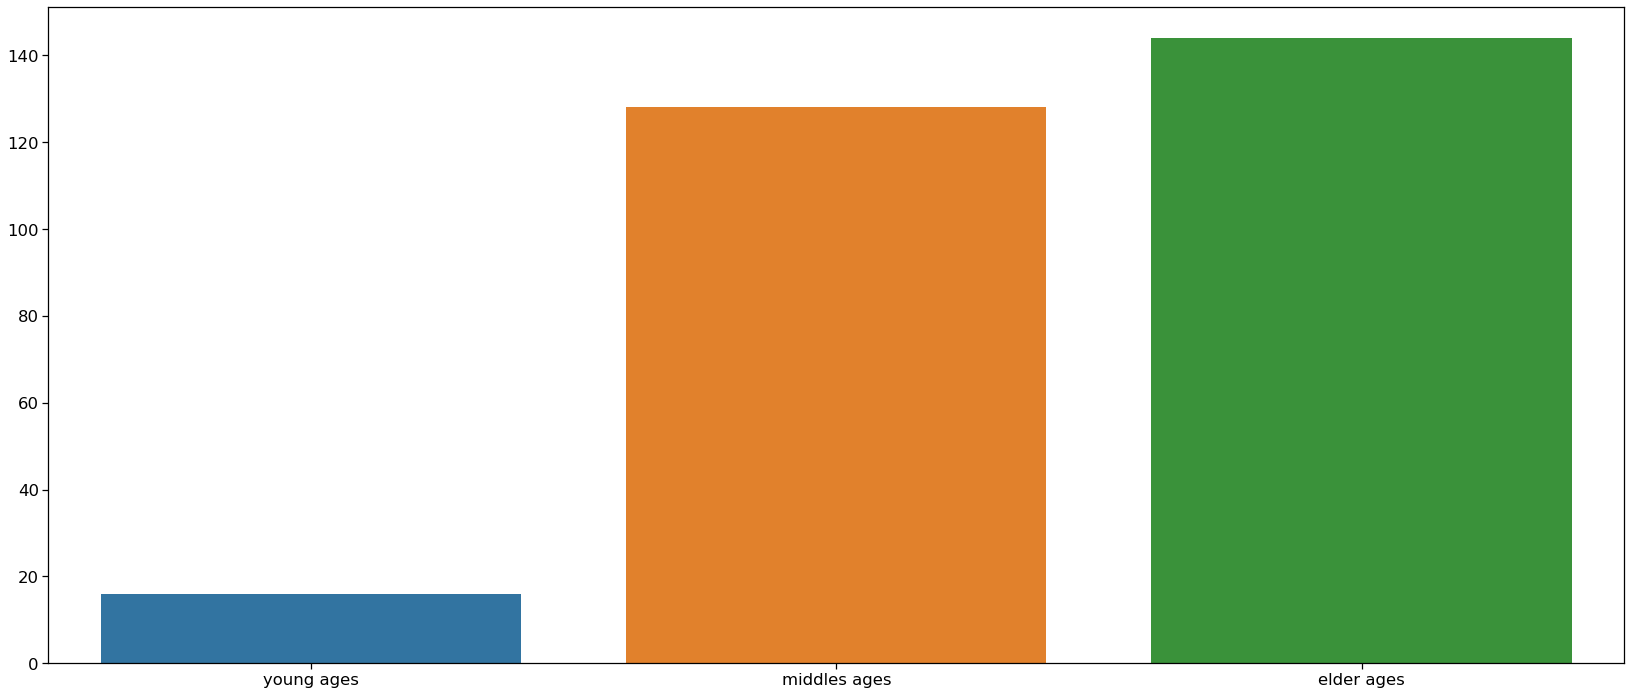

In [22]:
young = data[(data.age>=29)&(data.age<40)]
middle = data[(data.age>=40)&(data.age<55)]

elder = data[(data.age<55)]

plt.figure(figsize=(23,10))
sns.set_context('notebook',font_scale=1.5)
sns.barplot(x=['young ages','middles ages','elder ages'],y=[len(young),len(middle),len(elder)])
             
plt.tight_layout()


## Q whom sex counts are more?

<AxesSubplot:title={'center':'sex count'}, xlabel='sex', ylabel='count'>

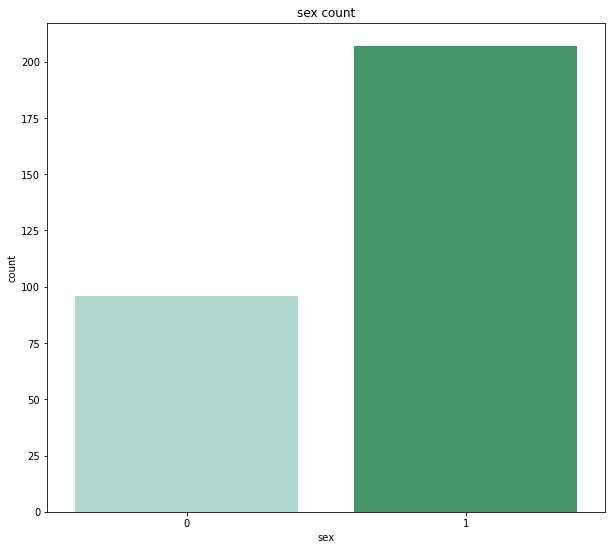

In [13]:
plt.figure(figsize=(10,9))
plt.title('sex count')
sns.countplot(x='sex',data=data,palette='BuGn')

## Q. whom chest pain are more ?

<AxesSubplot:title={'center':'chest pain type'}, xlabel='cp', ylabel='count'>

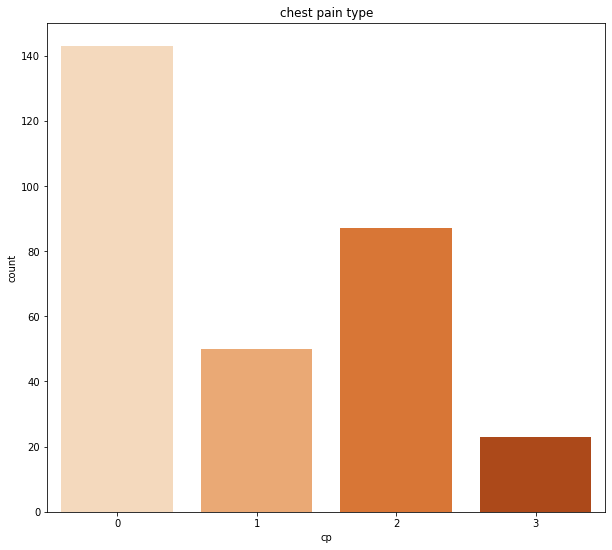

In [14]:
plt.figure(figsize=(10,9))
plt.title('chest pain type')
sns.countplot(x='cp',data=data,palette='Oranges')

## Q.whom fasting blood suga range is high?

Text(0.5, 1.0, 'heart diseases by fasting blood suga ')

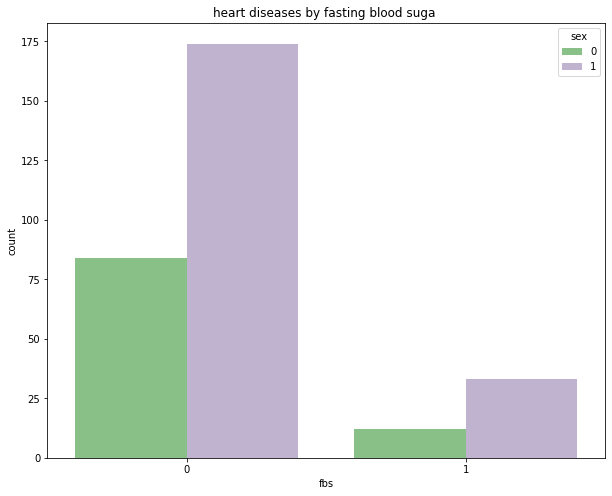

In [15]:
f,ax=plt.subplots(figsize=(10,8))
ax=sns.countplot(x='fbs',hue='sex',data=data,palette='Accent')
ax.set_title('heart diseases by fasting blood suga ')

# male=1,female=0

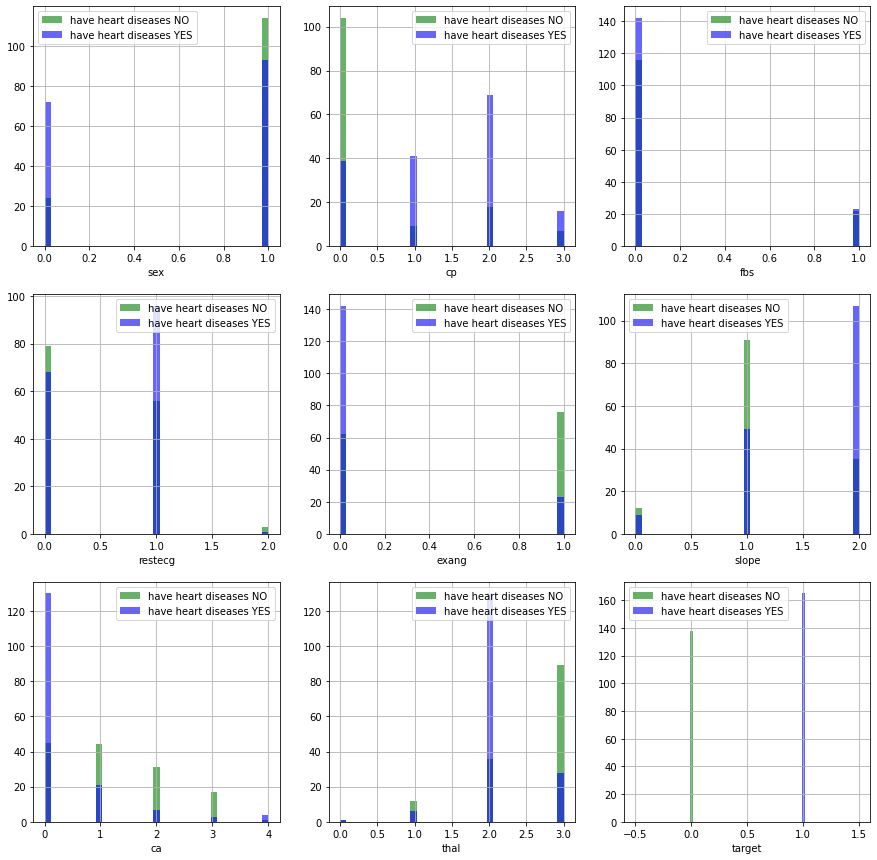

In [16]:
plt.figure(figsize=(15,15))
for i , column in enumerate(categorical_val,1):
    plt.subplot(3,3,i)
    data[data['target']==0][column].hist(bins=35,color='green',label='have heart diseases NO',alpha=0.6)
    data[data['target']==1][column].hist(bins=35,color='blue',label='have heart diseases YES',alpha=0.6)
    plt.legend()
    plt.xlabel(column)

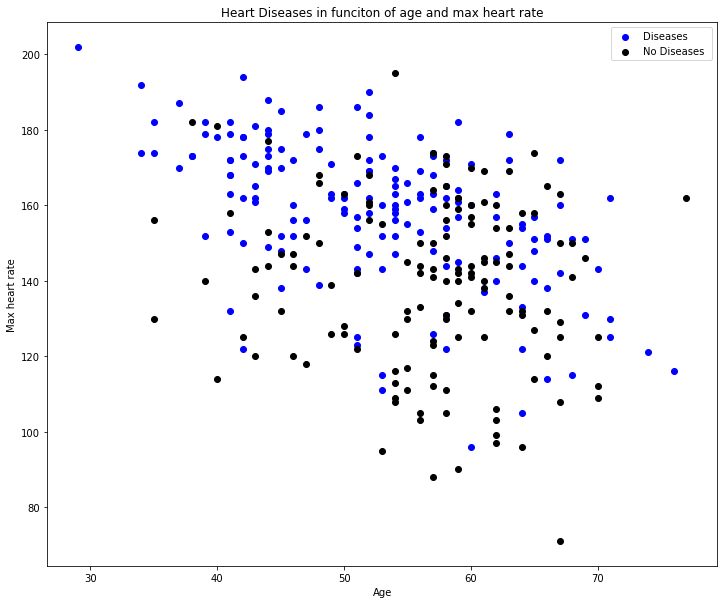

In [17]:
plt.figure(figsize=(12,10))

#positive case
plt.scatter(data.age[data.target==1],
           data.thalach[data.target==1],c='blue')

#negative case
plt.scatter(data.age[data.target==0],
           data.thalach[data.target==0],c='black')

plt.title('Heart Diseases in funciton of age and max heart rate')
plt.xlabel('Age')
plt.ylabel('Max heart rate')
plt.legend(['Diseases','No Diseases ']);



## split the data

In [18]:
from sklearn.model_selection import train_test_split
x=data.drop('target',axis=1)
y=data.target

In [19]:
x.shape

(303, 13)

In [20]:
y.shape

(303,)

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [22]:
print(X_train.shape,X_test.shape)

(242, 13) (61, 13)


In [23]:
print(Y_train.shape,Y_test.shape)

(242,) (61,)


## RandomForestClassifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,random_state=0)
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)

In [25]:
print(y_pred)


[0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0
 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [26]:
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_test,y_pred)
print('RondomForest score',np.abs(score)*100)

RondomForest score 88.52459016393442


## Decision tree classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

DT_GINI=DecisionTreeClassifier(criterion='gini',max_depth=20,random_state=42)
DT_GINI.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=20, random_state=42)

In [28]:
Y_pred=DT_GINI.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score
print('Model Accuracy is',accuracy_score(Y_test,Y_pred))


Model Accuracy is 0.7868852459016393


## naive bayes

In [70]:

from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [39]:
model.score(X_test,Y_test)
print('naive_bayes score',model.score(X_test,Y_test))

naive_bayes score 0.8524590163934426


##                                                                                            name: Tannu yadav